
# CNN을 이용하여, CIFAR-10 이미지 분류하기


# STEP 0: 데이터셋 설명

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


# STEP #1: 환결 설정 및 라이브러리 임포트

### 구글 드라이브 연결하여, 워킹 디렉토리 설정

[연결 방법 링크](https://vision-ai.tistory.com/entry/%EC%BD%94%EB%9E%A9%EC%97%90%EC%84%9C-%EB%93%9C%EB%9D%BC%EC%9D%B4%EB%B8%8C%EC%9D%98-csv-%ED%8C%8C%EC%9D%BC-%EC%9D%BD%EA%B8%B0)

### 라이브러리 임포트 하고, 데이터 셋 가져오기  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [2]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 19s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

# STEP #2: 이미지 Visualizing 해보자

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

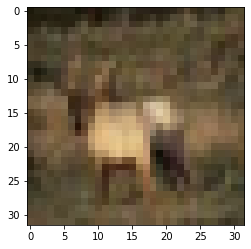

In [16]:
plt.imshow( X_train[3] )
plt.show()

In [17]:
y_train[3]

array([4], dtype=uint8)

# STEP #3: DATA 준비

### 학습을 위해서는, 데이터의 타입이 float 이어야 합니다. X_train 과 X_test 가 저장하고 있는 데이터가 float 인지 확인하시오.

In [19]:
X_train.dtype

dtype('uint8')

In [21]:
X_train = X_train.astype('float32')

In [22]:
X_test = X_test.astype('float32')

### 이 딥러닝의 결과는, 총 10개의 결과로 분류하는 문제이므로, y_train 과 y_test 의 값을 원핫인코딩으로 바꾸시오. 

In [23]:
from tensorflow.keras.utils import to_categorical

In [25]:
y_train = to_categorical(y_train, 10)

In [26]:
y_test = to_categorical(y_test, 10)

In [27]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

### 피처스케일링 하시오.

In [30]:
X_train = X_train / 255.0

In [31]:
X_test = X_test / 255.0

### 딥러닝의 입력층(input layer)의 모양을 알아야 합니다. 그래야 라이브러리에 적어주어서 학습을 시킬 수 있습니다. 따라서 input_shape 이라는 변수에, 입력층의 모양을 저장하시오.

In [32]:
X_train.shape

(50000, 32, 32, 3)

In [33]:
input_shape = (32, 32, 3)

# STEP #4: 모델링 및 학습시키기

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam



In [35]:
# def build_model():
#   model = Sequential()
#   model.add( Conv2D(64, (3,3), activation='relu', input_shape= input_shape))
#   model.add( Conv2D(32, (3,3), activation= 'relu'))
#   model.add( MaxPooling2D( 2, 2))

#   model.add( Conv2D(128, (3,3), activation='relu'))
#   model.add( Conv2D(64, (3,3), activation= 'relu'))
#   model.add( MaxPooling2D( 2, 2))

#   model.add( Flatten())
#   model.add(Dense(1024, 'relu'))
#   model.add(Dropout(0.4))
#   model.add(Dense(512, 'relu'))
#   model.add(Dense(10, 'softmax'))

#   return model

In [41]:
def build_model():
  model = Sequential()
  model.add( Conv2D(32, (3,3), activation='relu', input_shape= input_shape))
  model.add( MaxPooling2D( 2, 2))

  model.add( Conv2D(32, (3,3), activation= 'relu'))
  model.add( MaxPooling2D( 2, 2))

  model.add( Flatten())  
  model.add(Dropout(0.4))
  model.add(Dense(128, 'relu'))
  model.add(Dense(10, 'softmax'))

  return model

In [42]:
model = build_model()

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1152)             

### 옵티마이저는 RMSprop로 컴파일 하고, 학습을 진행하시오. 학습 결과는 저장하시오.

[옵티마이저 종류](https://vision-ai.tistory.com/entry/%EC%98%B5%ED%8B%B0%EB%A7%88%EC%9D%B4%EC%A0%80-Optimizer-%EC%A2%85%EB%A5%98)

In [44]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [45]:
model.compile('rmsprop', 'categorical_crossentropy', ['accuracy'] )

In [46]:
epoch_histoy = model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.5528 - accuracy: 0.4444
Epoch 2/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.2335 - accuracy: 0.5645
Epoch 3/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.1207 - accuracy: 0.6074
Epoch 4/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.0520 - accuracy: 0.6313
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0024 - accuracy: 0.6508
Epoch 6/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9650 - accuracy: 0.6649
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9342 - accuracy: 0.6772
Epoch 8/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.9086 - accuracy: 0.6846
Epoch 9/10
1563/1563 [==============================] - 59s 37ms/step - loss: 0.8845 - accuracy: 0.6965
Epoch 10/10
1563/1563 [==============================] - 57s 36m

# STEP #5: 모델 평가

### 테스트셋을 통해서, 정확도를 구해보자

In [47]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.8548 - accuracy: 0.7065


[0.8547996282577515, 0.7064999938011169]

### 테스트셋으로 예측한 결과를 가져오시오. 그리고 첫번째 이미지에 대한 결과값을 확인하시오.

In [49]:
y_pred = model.predict(X_test)

In [50]:
y_pred.shape

(10000, 10)

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
confusion_matrix(y_test, y_pred)

ValueError: ignored

### y_pred 에서, 각각 가장 큰 값들의 인덱스만 가져오시오. 그러면 그 인덱스를 통해서, 10가지 중에 무엇인지 확인이 가능합니다.

In [55]:
y_pred = y_pred.argmax(axis = 1)

### 실제 값들(ground truth) y_test 에서도, 가장 큰 값들의 인덱스만 가져오시오. 그러면 두개를 비교할 수 있습니다.

In [57]:
y_test = y_test.argmax(axis=1)

### 컨퓨전 매트릭스를 확인하시오. 그리고 seaborn 의 히트맵으로 시각화 하시오.

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [60]:
cm = confusion_matrix(y_test, y_pred)

In [61]:
cm

array([[744,  18,  27,  41,  21,   3,   9,  14,  62,  61],
       [ 13, 807,   1,  19,   3,   2,   3,   4,  21, 127],
       [ 71,   5, 459, 125, 127,  83,  49,  42,  15,  24],
       [ 19,  11,  36, 613,  67, 130,  51,  31,  14,  28],
       [ 22,   6,  37,  94, 687,  25,  27,  69,  15,  18],
       [ 12,   1,  31, 262,  44, 562,  22,  44,   5,  17],
       [  5,   5,  24,  95,  74,  23, 749,   5,   9,  11],
       [  7,   2,   9,  73,  50,  50,   2, 773,   5,  29],
       [ 56,  37,   5,  25,   9,   6,   2,   6, 812,  42],
       [ 16,  53,   3,  31,   1,   3,   5,  11,  18, 859]])

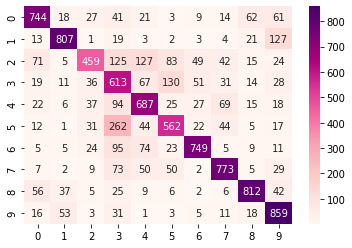

In [62]:
sns.heatmap(data= cm, annot=True, fmt='.0f', cmap='RdPu')
plt.show()

# STEP #6: 모델 저장하기

In [63]:
model.save('cifa10_model.h5')

# STEP #7: Data Augmentation 을 통한, 모델 Improving

- 원래 주어진 이미지를 통해, 이를 변형하여서 학습을 시키면 정확도가 증가한다. 
- 다음처럼 flipping, enlarging, rotating 을 통해서 원래의 이미지를 변형하여 학습시킨다.
- 또한 이미지를 이동시키거나 밝기 조정도 데이터 증강에 해당된다.

# STEP 7.1 Model Training using Augmented Dataset

In [65]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [66]:
X_train = X_train / 255.0

In [67]:
X_test = X_test / 255.0

In [68]:
y_train = to_categorical(y_train, 10)

In [69]:
y_test = to_categorical(y_test, 10)

In [70]:
model = build_model()

In [71]:
model.compile('rmsprop', 'categorical_crossentropy', ['accuracy'])

In [72]:
# 데이터 증강해서 학습시킬것이다!!  넘파이 어레이로 되어있는 데이터를 증강하는 방법!!!

In [64]:
from keras.preprocessing.image import ImageDataGenerator

In [73]:
# 학습에 사용할 넘파이 어레이를, 위에서 이미 피쳐 스케일링 했으므로, rescale 파라미터는 필요 없다!

In [74]:
train_datagen = ImageDataGenerator(horizontal_flip=True, zoom_range=0.2, rotation_range=15, 
                                   width_shift_range=0.1, height_shift_range=0.1)

In [76]:
train_genertor = train_datagen.flow(X_train, y_train)

In [77]:
## 학습

In [78]:
model.fit(train_genertor, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 89s 56ms/step - loss: 1.6606 - accuracy: 0.3986
Epoch 2/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.4232 - accuracy: 0.4918
Epoch 3/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.3360 - accuracy: 0.5275
Epoch 4/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.2925 - accuracy: 0.5408
Epoch 5/10
1563/1563 [==============================] - 88s 56ms/step - loss: 1.2609 - accuracy: 0.5531
Epoch 6/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.2302 - accuracy: 0.5657
Epoch 7/10
1563/1563 [==============================] - 87s 56ms/step - loss: 1.2124 - accuracy: 0.5728
Epoch 8/10
1563/1563 [==============================] - 88s 56ms/step - loss: 1.2018 - accuracy: 0.5780
Epoch 9/10
1563/1563 [==============================] - 87s 56ms/step - loss: 1.1895 - accuracy: 0.5826
Epoch 10/10
1563/1563 [==============================] - 89s 57m

# STEP 8. 컨퓨전 매트릭스를 통한 성능 측정

# GREAT JOB! 